In [2]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np

In [7]:
qqq = pdr.get_data_yahoo('QQQ',start='2018-01-01',end='2020-10-31')

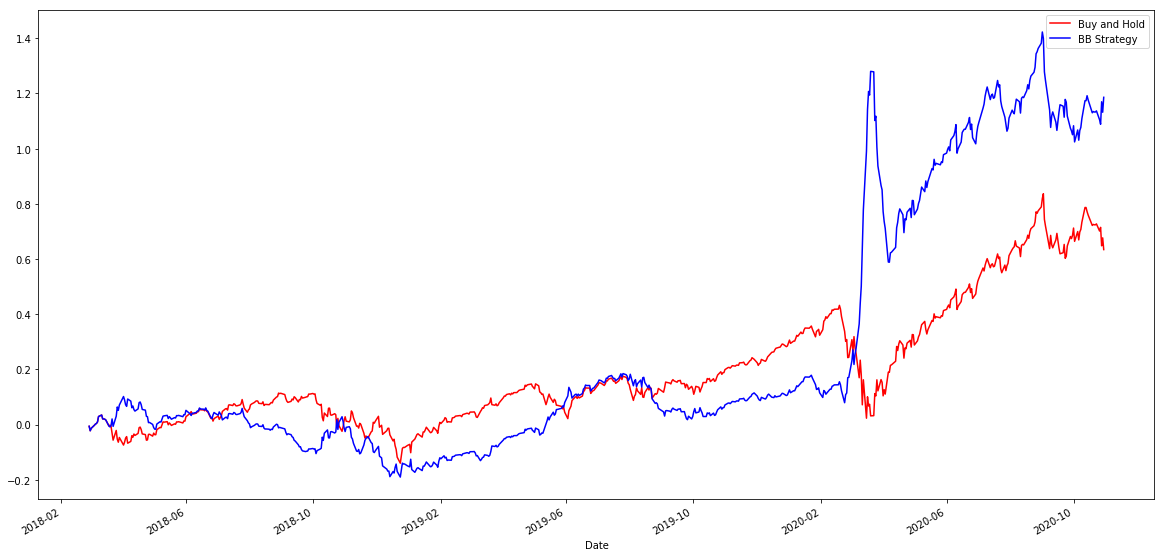

In [11]:
qqq['ma_20'] = qqq['Adj Close'].rolling(window=20).mean()
qqq['Std'] = qqq['Adj Close'].rolling(window=20).std()
qqq.dropna(inplace=True)
qqq['return'] = qqq['Adj Close']/qqq['Adj Close'].shift(1) -1



#Upper and Lower bands of Bollinger Bands
qqq['Upper band'] = qqq['ma_20'] + 2*qqq['Std']
qqq['Lower band'] = qqq['ma_20'] - 2*qqq['Std']


qqq['BB Strategy(upper)'] = np.where(qqq['Adj Close']>qqq['Upper band'],-1,0)


qqq['BB Strategy(within the range)'] = np.where((qqq['Adj Close']<qqq['Upper band']) & 
                                                (qqq['Adj Close']>qqq['ma_20']),1,0)


qqq['BB Strategy(within the range2)'] = np.where((qqq['Adj Close']<qqq['ma_20']) & 
                                                 (qqq['Adj Close']>qqq['Lower band']),-1,0)


qqq['BB Strategy(lower)'] = np.where(qqq['Adj Close']<qqq['Lower band'],1,0)

qqq['BB Strategy(total)'] = (qqq['BB Strategy(upper)'] + 
                            qqq['BB Strategy(lower)'] + 
                            qqq['BB Strategy(within the range)'] + 
                            qqq['BB Strategy(within the range2)'])
            
            
qqq['BB Strategy Return'] = qqq['BB Strategy(total)'].shift(1)*qqq['return']
qqq['BB Strategy Cummulative Return'] = qqq['BB Strategy Return'].add(1).cumprod().sub(1)


qqq['Cum return'] = qqq['return'].add(1).cumprod().sub(1)

plt.figure(figsize=(20,10))
qqq['Cum return'].plot(color='red')
qqq['BB Strategy Cummulative Return'].plot(color='blue')
plt.legend(['Buy and Hold','BB Strategy'])
plt.show()





In [9]:
#Compare Total Return of the period
print("Buy and Hold Strategy's Total Return: " + str(qqq['Cum return'][-1]))
print("BB Strategy's Total Return: "+ str(qqq['BB Strategy Cummulative Return'][-1]))

Buy and Hold Strategy's Total Return: 0.6298505445394593
BB Strategy's Total Return: 1.3355494685743277


In [10]:
#Compare Risk of the period
print("Buy and Hold Strategy's Standard Deviation: " + str(qqq['return'].std()))
print("BB Strategy's Standard Deviation: "+ str(qqq['BB Strategy Return'].std()))

Buy and Hold Strategy's Standard Deviation: 0.01692472879103214
BB Strategy's Standard Deviation: 0.01689092224058644


In [12]:
qqq.head()

,High,Low,Open,Close,Volume,Adj Close,ma_20,Std,return,Upper band,Lower band,BB Strategy(upper),BB Strategy(within the range),BB Strategy(within the range2),BB Strategy(lower),BB Strategy(total),BB Strategy Return,BB Strategy Cummulative Return,Cum return
Date,,,,,,,,,,,,,,,,,,,
2018-02-27,170.729996,168.210007,170.449997,168.289993,42209900.0,164.877258,160.406312,4.614455,NaN,169.635222,151.177402,0,1,0,0,1,NaN,NaN,NaN
2018-02-28,169.800003,167.100006,169.250000,167.210007,42936300.0,163.819183,160.333323,4.544338,-0.006417,169.421998,151.244647,0,1,0,0,1,-0.006417,-0.006417,-0.006417
2018-03-01,168.070007,163.000000,167.300003,164.479996,76809900.0,161.144531,160.092312,4.353779,-0.016327,168.799870,151.384754,0,1,0,0,1,-0.016327,-0.022639,-0.022639
2018-03-02,166.279999,161.960007,162.500000,165.990005,57445100.0,162.623917,159.995808,4.270269,0.009180,168.536346,151.455271,0,1,0,0,1,0.009180,-0.013667,-0.013667
2018-03-05,168.259995,164.589996,165.210007,167.830002,38540200.0,164.426605,160.153545,4.376821,0.011085,168.907188,151.399903,0,1,0,0,1,0.011085,-0.002733,-0.002733
